<a href="https://colab.research.google.com/github/Rahul-Ramola/Group-Project/blob/main/Symptoms%20Based/disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving dataset.csv to dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df.head()


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import json
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn

%matplotlib inline

In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
df.dtypes

,0
Disease,object
Symptom_1,object
Symptom_2,object
Symptom_3,object
Symptom_4,object
Symptom_5,object
Symptom_6,object
Symptom_7,object
Symptom_8,object
Symptom_9,object


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': ***{len(unique_values)}***{(unique_values)}\n")

Unique values in 'Disease': ***41***['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']

Unique values in 'Symptom_1': ***34***['itching' ' skin_rash' ' continuous_sneezing' ' shivering'
 ' stomach_pain' ' acidity' ' vomiting' ' indigestion' ' muscle_wasting'
 ' patches_in_throat' ' fatigue' ' weight_loss' ' sunken_eyes' ' cough'
 ' headache' ' chest_pain' ' back_pain' ' weakne

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4915,True
4916,True
4917,True
4918,True


In [ ]:
df.isnull().any()

,0
Disease,False
Symptom_1,False
Symptom_2,False
Symptom_3,False
Symptom_4,True
Symptom_5,True
Symptom_6,True
Symptom_7,True
Symptom_8,True
Symptom_9,True


Stripping spaces and filling null values

In [ ]:
cols = df.select_dtypes(include="object").columns

df[cols] = (
    df[cols]
    .apply(lambda col: col.str.replace('_', ' ', regex=False).str.strip())
)


In [ ]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.fillna(0)
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning movements,loss of balance,unsteadiness,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,burning micturition,bladder discomfort,foul smell of urine,continuous feel of urine,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

,0
Disease,object
Symptom_1,object
Symptom_2,object
Symptom_3,object
Symptom_4,object
Symptom_5,object
Symptom_6,object
Symptom_7,object
Symptom_8,object
Symptom_9,object


In [ ]:
df.isnull().any().any()

np.False_

In [ ]:
df["Disease"].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

Total no. of available symptoms

In [ ]:
# Extract unique words across all columns except 'disease'
unique_words = set(df.drop(columns='Disease').values.flatten())
unique_words.remove(0)
unique_words

{'abdominal pain',
 'abnormal menstruation',
 'acidity',
 'acute liver failure',
 'altered sensorium',
 'anxiety',
 'back pain',
 'belly pain',
 'blackheads',
 'bladder discomfort',
 'blister',
 'blood in sputum',
 'bloody stool',
 'blurred and distorted vision',
 'breathlessness',
 'brittle nails',
 'bruising',
 'burning micturition',
 'chest pain',
 'chills',
 'cold hands and feets',
 'coma',
 'congestion',
 'constipation',
 'continuous feel of urine',
 'continuous sneezing',
 'cough',
 'cramps',
 'dark urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic  patches',
 'distention of abdomen',
 'dizziness',
 'drying and tingling lips',
 'enlarged thyroid',
 'excessive hunger',
 'extra marital contacts',
 'family history',
 'fast heart rate',
 'fatigue',
 'fluid overload',
 'foul smell of urine',
 'headache',
 'high fever',
 'hip joint pain',
 'history of alcohol consumption',
 'increased appetite',
 'indigestion',
 'inflammatory nails',
 'internal itching',
 'irregular sug

In [ ]:
any('_' in word for word in unique_words)

False

In [ ]:
len(unique_words)

131

Create new columns

In [ ]:
symptom_df = df.drop(columns="Disease")


In [ ]:
binary_features = pd.DataFrame(
    {
        word: symptom_df.eq(word).any(axis=1).astype(int)
        for word in unique_words
        if word != ""
    }
)

In [ ]:
df_final = pd.concat([binary_features, df["Disease"]], axis=1)

In [ ]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,indigestion,movement stiffness,scurring,acidity,small dents in nails,dehydration,depression,foul smell of urine,weakness of one body side,enlarged thyroid
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning movements,loss of balance,unsteadiness,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4917,Urinary tract infection,burning micturition,bladder discomfort,foul smell of urine,continuous feel of urine,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4918,Psoriasis,skin rash,joint pain,skin peeling,silver like dusting,small dents in nails,inflammatory nails,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df=df_final

In [ ]:
df_final.sample(5)

,excessive hunger,cramps,fast heart rate,fatigue,weight gain,loss of balance,sweating,bloody stool,family history,slurred speech,...,movement stiffness,scurring,acidity,small dents in nails,dehydration,depression,foul smell of urine,weakness of one body side,enlarged thyroid,Disease
455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
4485,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chicken pox
2398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Osteoarthristis
2140,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma
471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS


LabelEncoding disease

In [ ]:
le = LabelEncoder()
df["Disease"] = le.fit_transform(df["Disease"])

df

,excessive hunger,cramps,fast heart rate,fatigue,weight gain,loss of balance,sweating,bloody stool,family history,slurred speech,...,movement stiffness,scurring,acidity,small dents in nails,dehydration,depression,foul smell of urine,weakness of one body side,enlarged thyroid,Disease
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,38
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,35


In [ ]:
diseases_classes=le.classes_
diseases_classes

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [ ]:
len(diseases_classes)

41

In [ ]:
diseases_classes[15]

'Fungal infection'

Splitting training - testing

In [ ]:
x=df.drop('Disease', axis=1)
y= df['Disease']

In [ ]:
x

,excessive hunger,cramps,fast heart rate,fatigue,weight gain,loss of balance,sweating,bloody stool,family history,slurred speech,...,indigestion,movement stiffness,scurring,acidity,small dents in nails,dehydration,depression,foul smell of urine,weakness of one body side,enlarged thyroid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
symptoms=x.columns
len(symptoms)

131

In [ ]:
x = x.to_numpy()
y = y.to_numpy()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([15, 15, 15, ..., 38, 35, 27])

In [ ]:
x_train, x_test, y_train, y_test=  train_test_split(x,y, test_size=0.1, random_state=1,stratify=y)

One hot encoding for disease_classes

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=41
)

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=41
)

y_train_categorical = y_train_categorical.astype("float32")
y_test_categorical  = y_test_categorical.astype("float32")

y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
len(diseases_classes)

41

ANN

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(60, activation='relu'),
    keras.layers.Dense(len(diseases_classes), activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_train,
    y_train_categorical,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test_categorical),
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)


Epoch 1/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5726 - loss: 2.8489 - val_accuracy: 1.0000 - val_loss: 0.1751
Epoch 2/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1027 - val_accuracy: 1.0000 - val_loss: 0.0208
Epoch 3/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0190 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 4/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 5/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 6/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 7/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 8/50
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.

Evaluation

In [ ]:
model.evaluate(x_test, y_test_categorical)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.7474e-06 


[9.248522474081255e-06, 1.0]

In [ ]:
yp = model.predict(x_test)
yp[:5]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[1.1672057e-15, 1.1994374e-09, 3.2607842e-15, 1.7301708e-16,
        1.0238611e-09, 6.6097009e-13, 2.7434938e-12, 4.9798572e-11,
        7.5208451e-11, 2.9440824e-18, 9.9999911e-01, 8.7261676e-10,
        1.4542867e-13, 9.1787111e-09, 2.2463756e-14, 2.0126112e-12,
        1.2322933e-07, 3.2756844e-14, 4.9871828e-16, 1.6353008e-10,
        5.4836384e-17, 2.3963865e-14, 3.7527733e-12, 2.1941601e-07,
        1.4887298e-08, 3.3076539e-10, 1.9257270e-14, 2.5632778e-08,
        5.3897544e-13, 6.3897276e-11, 5.5725397e-11, 6.5063510e-08,
        1.5427777e-09, 9.7310004e-16, 1.3860438e-07, 3.9745839e-15,
        8.0060630e-08, 4.6532811e-10, 1.0429533e-07, 3.8002538e-13,
        1.1056006e-11],
       [1.7322098e-08, 1.7682149e-08, 2.1487197e-06, 2.0362220e-10,
        2.0143994e-11, 7.0284989e-07, 1.1543104e-07, 2.5343257e-11,
        1.4992814e-06, 3.1111165e-06, 5.6720700e-10, 1.3481922e-08,
        1.0024998e-07, 1.1705181e-06, 9.9997491e-01, 8.9433206e-06,
        9.0922789e-08, 7

In [ ]:
y_pred=[]
for arr in yp:
    y_pred.append( np.argmax(arr))

y_pred = np.array(y_pred)
y_pred

array([10, 14, 17, 15,  7, 26, 16, 20, 10, 29, 39, 20, 34, 30, 19, 36, 38,
       18, 24, 10,  1,  0, 13, 28,  5, 18, 10,  9, 30, 28, 20, 10,  0, 34,
       40,  4, 28, 13, 37,  5, 25, 18,  9, 11,  1,  2, 27,  1, 12, 17, 31,
       23,  8, 25, 28, 23, 38, 18,  3,  7,  8, 26,  2, 28, 24,  6, 20, 28,
       20,  0,  6,  2,  4, 21, 13, 25, 34, 40, 13, 40, 31,  8, 22,  8,  3,
       16, 11, 33, 26, 36,  5,  4, 39,  2, 24,  5,  9, 29, 27, 39, 23, 26,
       24, 26,  4, 30, 20, 15, 22, 13, 34,  1,  1,  2, 11, 18, 32,  9, 28,
       20, 24, 18, 39, 36,  9, 29, 25, 11, 17, 37,  2, 26, 27, 18,  4, 34,
       37, 33, 21, 30, 38, 14,  3, 15,  3, 33,  6, 15, 11, 32,  3, 10, 30,
        9, 27, 40, 29,  4,  3,  8, 18, 19,  0, 29, 27, 12,  6, 19, 19,  7,
        8, 37, 17, 11, 15, 23, 27, 30, 20,  5, 26, 22,  9,  6,  3, 36, 36,
       27, 36, 37, 16,  0, 40,  7,  1, 31, 37, 27,  7, 24, 10, 23,  4, 37,
       27,  6, 12, 18, 12, 37, 28, 16,  8,  7, 37, 29, 16, 38, 16, 25, 25,
        8, 22, 30, 28, 23

In [ ]:
y_test

array([10, 14, 17, 15,  7, 26, 16, 20, 10, 29, 39, 20, 34, 30, 19, 36, 38,
       18, 24, 10,  1,  0, 13, 28,  5, 18, 10,  9, 30, 28, 20, 10,  0, 34,
       40,  4, 28, 13, 37,  5, 25, 18,  9, 11,  1,  2, 27,  1, 12, 17, 31,
       23,  8, 25, 28, 23, 38, 18,  3,  7,  8, 26,  2, 28, 24,  6, 20, 28,
       20,  0,  6,  2,  4, 21, 13, 25, 34, 40, 13, 40, 31,  8, 22,  8,  3,
       16, 11, 33, 26, 36,  5,  4, 39,  2, 24,  5,  9, 29, 27, 39, 23, 26,
       24, 26,  4, 30, 20, 15, 22, 13, 34,  1,  1,  2, 11, 18, 32,  9, 28,
       20, 24, 18, 39, 36,  9, 29, 25, 11, 17, 37,  2, 26, 27, 18,  4, 34,
       37, 33, 21, 30, 38, 14,  3, 15,  3, 33,  6, 15, 11, 32,  3, 10, 30,
        9, 27, 40, 29,  4,  3,  8, 18, 19,  0, 29, 27, 12,  6, 19, 19,  7,
        8, 37, 17, 11, 15, 23, 27, 30, 20,  5, 26, 22,  9,  6,  3, 36, 36,
       27, 36, 37, 16,  0, 40,  7,  1, 31, 37, 27,  7, 24, 10, 23,  4, 37,
       27,  6, 12, 18, 12, 37, 28, 16,  8,  7, 37, 29, 16, 38, 16, 25, 25,
        8, 22, 30, 28, 23

Prediction function

In [ ]:
def get_prediction_with_confidence(model, x_input):
    # Predict probabilities
    predictions = model.predict(x_input.reshape(1,-1))

    # Get the predicted class (index of the highest probability)
    predicted_class = diseases_classes [np.argmax(predictions, axis=1)]

    # Get the confidence score (highest probability)
    confidence_score = np.max(predictions, axis=1)

    return predicted_class, confidence_score

In [ ]:
# Example usage
predicted_class, confidence_score = get_prediction_with_confidence(model, x_test[2])

print(f"Predicted class: {predicted_class[0]}, Confidence score: {confidence_score[0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: Gastroenteritis, Confidence score: 1.0000


In [ ]:
x_test[2]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
diseases_classes[y_test[2]]

'Gastroenteritis'

Confusion Metrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        12
          13       1.00      1.00      1.00        12
          14       1.00      1.00      1.00        12
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        12
          17       1.00    

Text(95.72222222222221, 0.5, 'Truth')

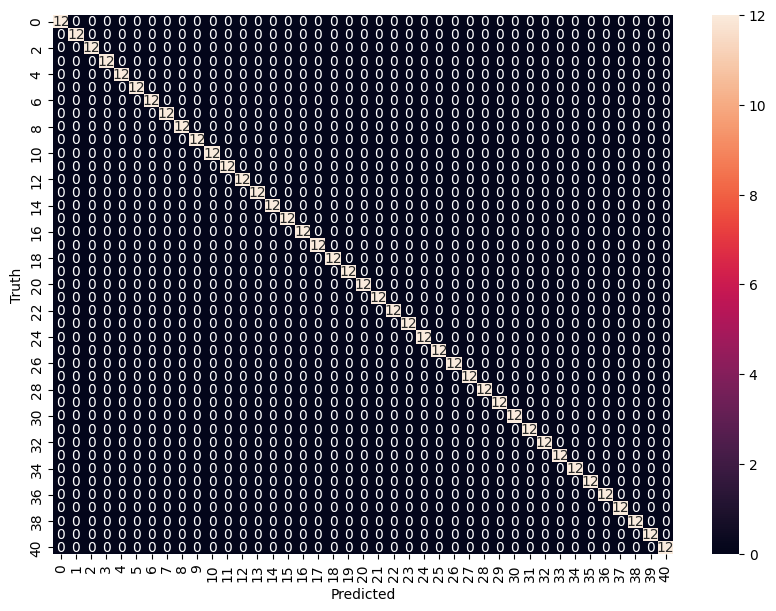

In [ ]:
# from sklearn.metrics import confusion_matrix , classification_report
# import seaborn as sn

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

#   import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
diseases_classes

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [ ]:
symptoms

Index(['excessive hunger', 'cramps', 'fast heart rate', 'fatigue',
       'weight gain', 'loss of balance', 'sweating', 'bloody stool',
       'family history', 'slurred speech',
       ...
       'indigestion', 'movement stiffness', 'scurring', 'acidity',
       'small dents in nails', 'dehydration', 'depression',
       'foul smell of urine', 'weakness of one body side', 'enlarged thyroid'],
      dtype='object', length=131)

Saving Model

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os

MODEL_DIR = "/content/drive/MyDrive/MedicalAI/models"
os.makedirs(MODEL_DIR, exist_ok=True)

In [ ]:
model.save(f"{MODEL_DIR}/disease_model.keras")

NameError: name 'model' is not defined

In [ ]:
import json

data = {
    "model_path": f"{MODEL_DIR}/disease_model.keras",
    "diseases_classes": diseases_classes.tolist(),
    "symptoms": symptoms.tolist(),
    "input_dim": len(symptoms)
}

with open(f"{MODEL_DIR}/model_detail.json", "w") as f:
    json.dump(data, f, indent=4)


NameError: name 'diseases_classes' is not defined

In [ ]:
import numpy as np

np.save(f"{MODEL_DIR}/x_test.npy", x_test)
np.save(f"{MODEL_DIR}/y_test.npy", y_test)

Checking model loading and testing functions

In [ ]:
MODEL_DIR = "/content/drive/MyDrive/MedicalAI/models"

# Load metadata
with open(f"{MODEL_DIR}/model_detail.json", "r") as f:
    data = json.load(f)

# Load model
loaded_model = keras.models.load_model(
    data["model_path"],
    compile=False
)

# Load mappings
diseases_classes = data["diseases_classes"]
symptoms_classes = data["symptoms"]

NameError: name 'json' is not defined

In [ ]:
print("diseases_classes:", diseases_classes)
print("\nsymptoms_classes:", symptoms_classes)

diseases_classes: ['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis', 'Common Cold', 'Dengue', 'Diabetes', 'Dimorphic hemmorhoids(piles)', 'Drug Reaction', 'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Hypertension', 'Hyperthyroidism', 'Hypoglycemia', 'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine', 'Osteoarthristis', 'Paralysis (brain hemorrhage)', 'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis', 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']

symptoms_classes: ['excessive hunger', 'cramps', 'fast heart rate', 'fatigue', 'weight gain', 'loss of balance', 'sweating', 'bloody stool', 'family history', 'slurred speech', 'receiving unsterile injections', 'constipation', 'watering from eyes', 'passage of gases', 'patches in

In [ ]:
x_test = np.load(f"{MODEL_DIR}/x_test.npy")
y_test = np.load(f"{MODEL_DIR}/y_test.npy")

In [ ]:
diseases_classes.index("Typhoid")

37

In [ ]:
indices = [index for index, value in enumerate(y_test) if value == 37]
indices

[38, 129, 136, 171, 189, 196, 203, 209, 214, 380, 407, 443]

In [ ]:
[symptoms_classes[i] for i , sym in enumerate(x_test[38])if sym==1]

['fatigue',
 'constipation',
 'toxic look (typhos)',
 'headache',
 'vomiting',
 'nausea',
 'diarrhoea',
 'high fever',
 'chills',
 'abdominal pain',
 'belly pain']